In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pydna.utils import parse_text_table

In [4]:
data = """\
Time (h)	OD600
0.000	    0.1000
13.183	    0.1620
15.917	    0.2800
18.000	    0.4600
19.833	    0.5600
21.750	    0.6200
23.750	    0.8000
27.500	    1.1800
32.750	    2.0200
41.500	    4.7200
44.167	    5.7200
48.833	    6.0400
53.283	    5.9600
"""
*r, cr = parse_text_table(data)

In [5]:
# Data input
xData = np.array(cr[0][1:], dtype="f")
yData = np.array(cr[1][1:], dtype="f")

In [6]:
xData

array([ 0.   , 13.183, 15.917, 18.   , 19.833, 21.75 , 23.75 , 27.5  ,
       32.75 , 41.5  , 44.167, 48.833, 53.283], dtype=float32)

In [7]:
yData

array([0.1  , 0.162, 0.28 , 0.46 , 0.56 , 0.62 , 0.8  , 1.18 , 2.02 ,
       4.72 , 5.72 , 6.04 , 5.96 ], dtype=float32)

In [8]:
def mgomb(t, A, Tlag, µm):
    """
    Modified Gompertz 
    Tjørve 2017 
    Zwietering 1990  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC184525

    A = upper asymptote
    t = time
    µm = growth-rate coefficient
    Tlag =
    """
    return A*np.exp(-np.exp((np.e*µm/A)*(Tlag-t)+1))

    # =$C$18+$D$11*EXP(-EXP(($D$12*EXP(1))/$D$11*($D$13-B19)+1))

    # = c + A*EXP(-EXP( ($D$12*EXP(1))/$D$11*($D$13-B19)+1 ))

    =$C$18+$D$11*EXP(-EXP(($D$12*EXP(1))/$D$11*($D$13-B19)+1))


    =$C$18+$D$11*EXP(-EXP((($D$12*EXP(1))/$D$11)*($D$13-B30)+1))


    = constant + A * EXP(-EXP(((µm *EXP(1))/$D$11)*($D$13-B30)+1))

In [9]:
# curve fit the test data
fittedParameters, pcov = curve_fit(mgomb, 
                                   xData, 
                                   yData,
                                   bounds=([0.01, 20.0, 0.01], [8.0, 25.0, 1.0]))

In [10]:
A, Tlag, µm = fittedParameters

In [11]:
A, Tlag, µm

(7.7192301177360765, 22.244029311048934, 0.2459355869158096)

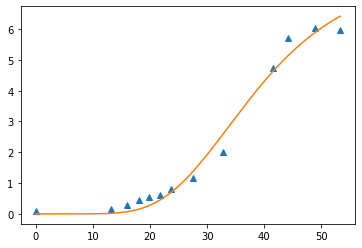

In [12]:
fig, ax = plt.subplots()
ax.plot(xData, yData, "^")
t = np.arange(min(xData), max(xData), 0.01)
ax.plot(t, mgomb(t, A, Tlag, µm))
plt.show()

In [13]:
def exp_growth(t, x0, µmax):
    # x0 initial optical density
    # t = time (h)
    # µmax maximum growth rate (1/h)
    return x0 * np.exp(µmax * t)

In [14]:
first_data_point = 8

In [15]:
number_of_datapoints = 3

In [16]:
xSelection = xData[first_data_point:first_data_point+number_of_datapoints]

In [17]:
ySelection = yData[first_data_point:first_data_point+number_of_datapoints]

In [18]:
fittedParameters, pcov = curve_fit(exp_growth, 
                                   xSelection,
                                   ySelection,
                                   bounds=([0.0, 0.0], [1.0, 1.0]))

In [19]:
x0, µmax = fittedParameters

In [20]:
x0

0.11219688754330762

In [28]:
µmax, µm

(0.08935592455733433, 0.2459355869158096)

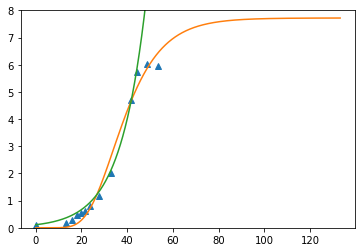

In [27]:
fig, ax = plt.subplots()
plt.ylim(ymax = 8)
ax.plot(xData, yData, "^")
t = np.arange(min(xData), max(xData)*2.5, 0.01)
ax.plot(t, mgomb(t, A, Tlag, µm))
ax.plot(t, exp_growth(t, x0, µmax))
plt.show()

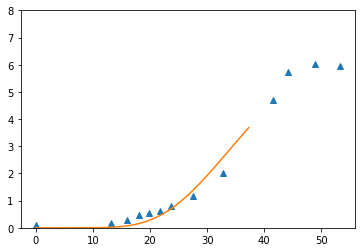

In [31]:
fig, ax = plt.subplots()
plt.ylim(ymax = 8)
ax.plot(xData, yData, "^")
t = np.arange(min(xData), max(xData)*0.7, 0.01)
ax.plot(t, mgomb(t, A, Tlag, µm))
plt.show()

In [35]:
sim_xData = np.arange(0, 40, 0.01)

In [36]:
sim_yData = mgomb(sim_xData, A, Tlag, µm)

In [37]:
sim_yData

array([6.06982548e-08, 6.16867602e-08, 6.26904874e-08, ...,
       4.29793821e+00, 4.30011747e+00, 4.30229595e+00])

In [38]:
fittedParameters, pcov = curve_fit(exp_growth, 
                                   sim_xData,
                                   sim_yData,
                                   bounds=([0.0, 0.0], [1.0, 1.0]))

In [39]:
x0, µmax = fittedParameters

In [44]:
x0, µmax

(0.06075649702758397, 0.11017518510143003)

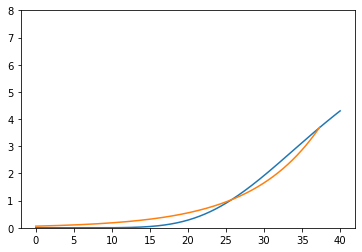

In [46]:
fig, ax = plt.subplots()
plt.ylim(ymax = 8)
ax.plot(sim_xData, sim_yData)
ax.plot(t, exp_growth(t, x0, μmax))
plt.show()